In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
Areas_L8 = pd.read_csv('Area_L8.csv', header=0)
Areas_L7 = pd.read_csv('Area_L7.csv', header=0)
Areas_L5 = pd.read_csv('Area_L5.csv', header=0)

In [190]:
times = pd.concat([Areas_L8['time'], Areas_L7['time'], Areas_L5['time']])
areas = pd.concat([Areas_L8['area'], Areas_L7['area'], Areas_L5['area']])

In [191]:
def linear_func(x, m, c):
    return m * x + c

# Fit the line to the data
popt, pcov = curve_fit(linear_func, times, areas)

# Extract the slope (m) and intercept (c) from the fitted parameters
m, c = popt

In [192]:
centered = areas - linear_func(times, m, c)
lower = -np.nanstd(centered)
upper = np.nanstd(centered)

In [193]:
bool1 = centered > upper*3
bool2 = centered < lower*3
areas.loc[bool1 | bool2] = np.nan

valid_indices = np.where(~np.isnan(times) & ~np.isnan(areas))
print(valid_indices)
times_ = times.iloc[valid_indices]
areas_ = areas.iloc[valid_indices]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)


In [194]:
def linear_func(x, m, c):
    return m * x + c

# Fit the line to the data
popt, pcov = curve_fit(linear_func, times_, areas_)

# Extract the slope (m) and intercept (c) from the fitted parameters
m_, c_ = popt

In [195]:
print(m_)
print(c_)

-0.8341616591163921
1778.6072904754249


In [196]:
bool1_ = Areas_L8['area'] > linear_func(Areas_L8['time'], m, c) + upper*3
bool2_ = Areas_L8['area'] < linear_func(Areas_L8['time'], m, c) + lower*3
Areas_L8.loc[bool1_ | bool2_] = np.nan

bool1_ = Areas_L7['area'] > linear_func(Areas_L7['time'], m, c) + upper*3
bool2_ = Areas_L7['area'] < linear_func(Areas_L7['time'], m, c) + lower*3
Areas_L7.loc[bool1_ | bool2_] = np.nan

bool1_ = Areas_L5['area'] > linear_func(Areas_L5['time'], m, c) + upper*3
bool2_ = Areas_L5['area'] < linear_func(Areas_L5['time'], m, c) + lower*3
Areas_L5.loc[bool1_ | bool2_] = np.nan

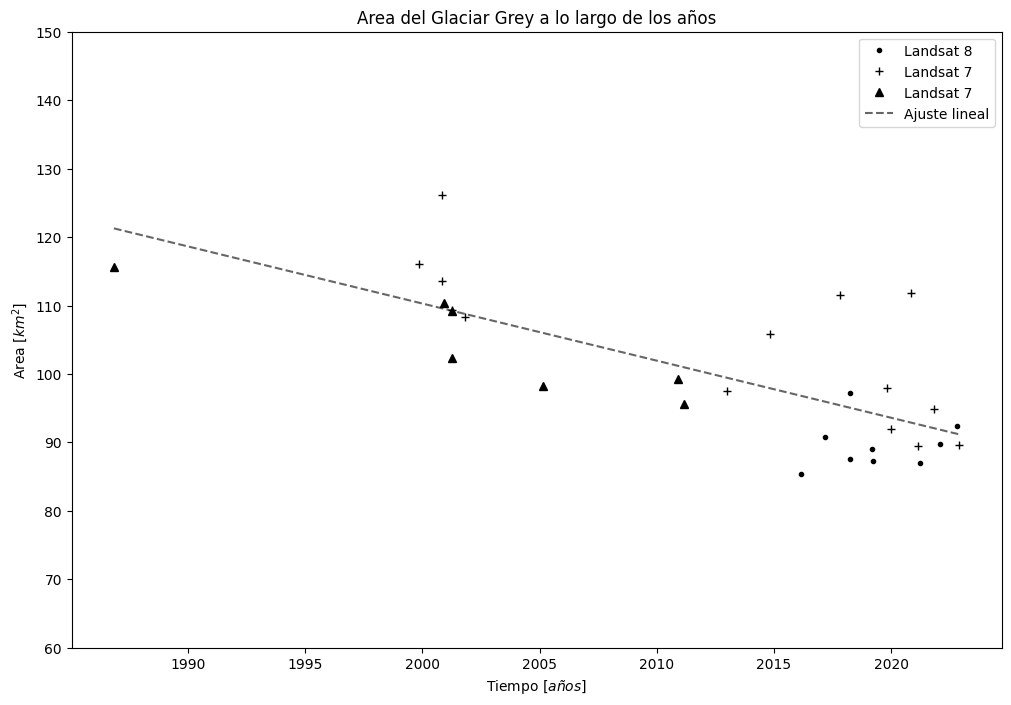

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Area del Glaciar Grey a lo largo de los años')
ax.set_xlabel('Tiempo $[años]$')
ax.set_ylabel('Area $[km^2]$')
ax.set_ylim(2*3*10, 5*3*10)
ax.plot(Areas_L8['time'], Areas_L8['area'], '.', color='black', label='Landsat 8')
ax.plot(Areas_L7['time'], Areas_L7['area'], '+', color='black', label='Landsat 7')
ax.plot(Areas_L5['time'], Areas_L5['area'], '^', color='black', label='Landsat 7')
ax.plot(times.sort_values(), m_*times.sort_values() + c_, linestyle='--', color='k', label='Ajuste lineal', alpha=0.6)
#ax.plot(times_L9, Areas_L9, '.', color='black', label='Landsat 9')
#ax.plot(times_L5, Areas_L5, '^', color='black', label='Landsat 5')
#ax.plot(times_S2, Areas_S2, '.', color='red', label='Sentinel 2')
plt.savefig('glacier_grey.png')
plt.legend()